In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

### Loading all the data

In [2]:
train = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\House_Prices\train.csv")
test = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\House_Prices\test.csv")


### Review input features

##### Training Dataset

In [3]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train.shape, "\n")
print ("Column Headers:", list(train.columns.values), "\n")
print (train.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (1460, 81) 

Column Headers: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'G

In [4]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train:
    # Find all the unique feature values
    uniq = train[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'Id' has 1460 unique values
~~Listing up to 10 unique values~~
[ 1  2  3  4  5  6  7  8  9 10]

-----------------------------------------------------------------------

'MSSubClass' has 15 unique values
~~Listing up to 10 unique values~~
[ 60  20  70  50 190  45  90 120  30  85]

-----------------------------------------------------------------------

'MSZoning' has 5 unique values
['RL' 'RM' 'C (all)' 'FV' 'RH']

-----------------------------------------------------------------------

'LotFrontage' has 111 unique values
~~Listing up to 10 unique values~~
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.]

-----------------------------------------------------------------------

'LotArea' has 1073 unique values
~~Listing up to 10 unique values~~
[ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420]

-----------------------------------------------------------------------

'Street' has 2 unique values
['Pave' 'Grvl']

------------------------------------

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#In this section, I am going to transform complete_excel data frame to have years as the rows and countries as the columns.
train .index = train[train.columns[0]]
transform = train.drop(train.columns[0],axis = 1)
transform.columns = map(lambda x: int(x) , transform.columns)
transform = transform.T
transform.head(5)

### Exploratory Data Analysis

#### Find all categorical data

In [6]:
cats = []
for col in train.columns.values:
    if train[col].dtype == 'object':
        cats.append(col)

#### Create separte datasets for Continuous vs Categorical

In [7]:
train_cont = train.drop(cats, axis=1)
train_cat = train[cats]

### Numerical Features

A numerical or continuous variable (attribute) is one that may take on any value within a finite or infinite interval (e.g., height, weight, temperature, blood glucose, ...). There are two types of numerical variables, interval and ratio. An interval variable has values whose differences are interpretable, but it does not have a true zero. A good example is temperature in Centigrade degrees. Data on an interval scale can be added and subtracted but cannot be meaningfully multiplied or divided. For example, we cannot say that one day is twice as hot as another day. In contrast, a ratio variable has values with a true zero and can be added, subtracted, multiplied or divided (e.g., weight).

In [8]:
train_cont.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
print("Some Statistics of the Housing Price:\n")
print(train['SalePrice'].describe())
print("\nThe median of the Housing Price is: ", train['SalePrice'].median(axis = 0))

Some Statistics of the Housing Price:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The median of the Housing Price is:  163000.0


##### Plotting univariate distributions

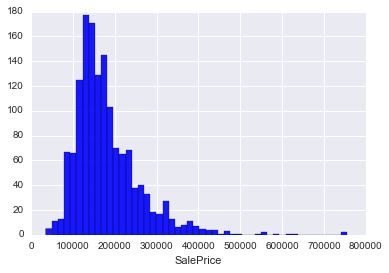

In [10]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(train['SalePrice'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

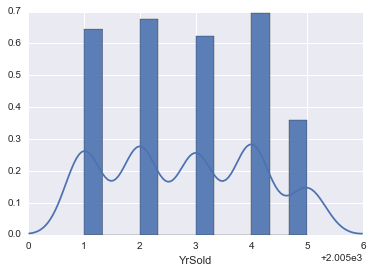

In [11]:
#draw a histogram and fit a kernel density estimate (KDE).
sns.distplot(train['YrSold'], hist_kws={'alpha': 0.9})

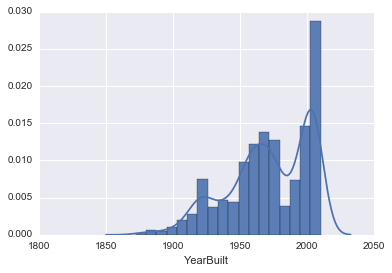

In [12]:
#draw a histogram and fit a kernel density estimate (KDE).
sns.distplot(train['YearBuilt'], hist_kws={'alpha': 0.9})

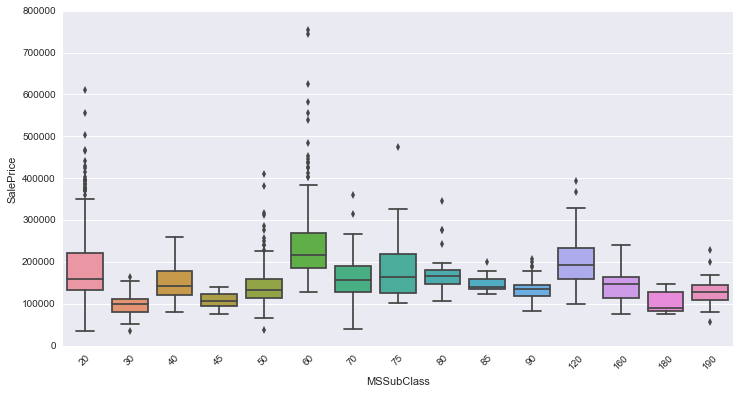

In [13]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'MSSubClass', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)


### Box plots for continuous features

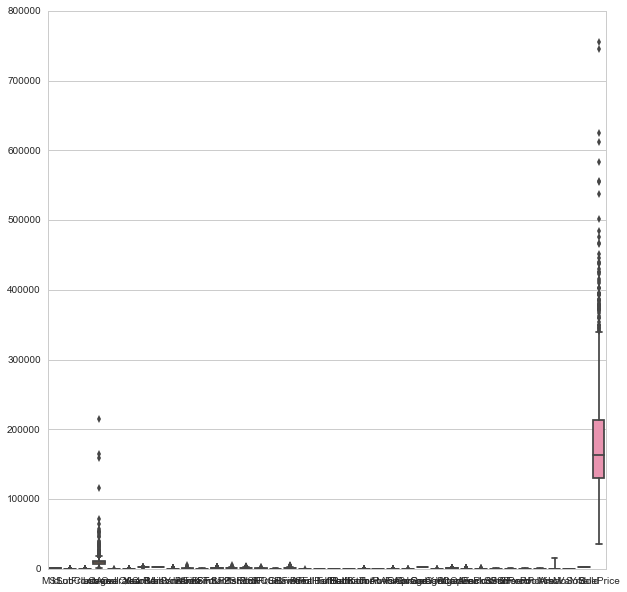

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(train_cont)

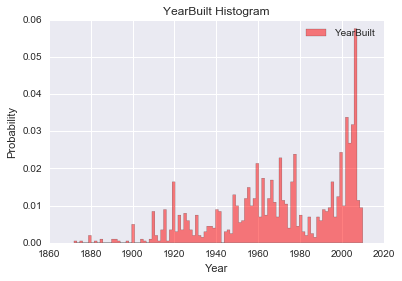

In [14]:
#Plot two sets of values on the same axis with a histogram.
#plt.hist(train['SalePrice'], bins=100, histtype='stepfilled', normed=True, color='b', label='SalePrice')
plt.hist(train['YearBuilt'], bins=100, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='YearBuilt')
plt.title("YearBuilt Histogram")
plt.xlabel("Year")
plt.ylabel("Probability")
plt.legend()
plt.show()

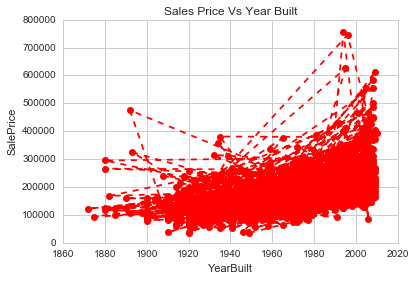

In [15]:
#Basic Data Plotting with Matplotlib: Lines, Points & Formatting
sns.set_style("whitegrid")
plt.plot(train['YearBuilt'], train['SalePrice'],marker='o', linestyle='--', color='r',label='Year Built')
#plt.plot(train['YrSold'], train['SalePrice'],  label='Year Sold')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('Sales Price Vs Year Built')
plt.show()

### Let us see the effect of .... on the sales price

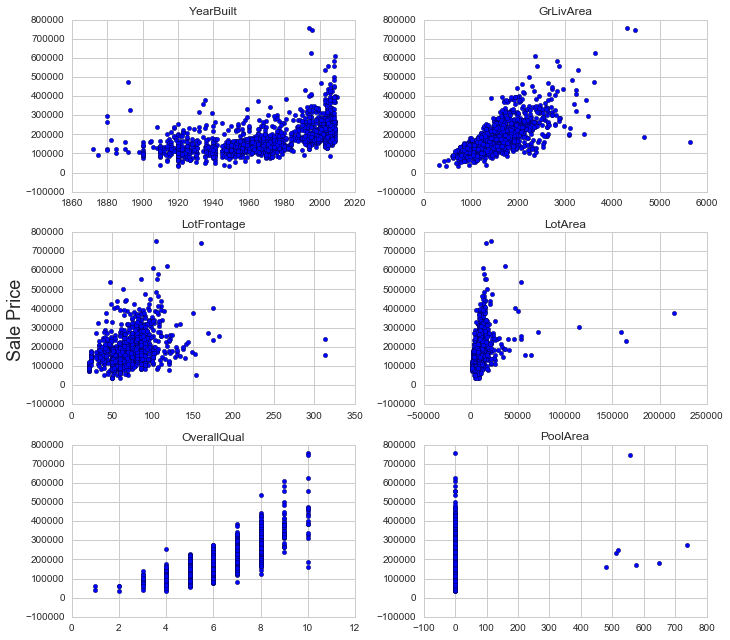

In [16]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = train.SalePrice.values
axarr[0, 0].scatter(train['YearBuilt'].values, price)
axarr[0, 0].set_title('YearBuilt')
axarr[0, 1].scatter(train.GrLivArea.values, price)
axarr[0, 1].set_title('GrLivArea')
axarr[1, 0].scatter(train.LotFrontage.values, price)
axarr[1, 0].set_title('LotFrontage')
axarr[1, 1].scatter(train['LotArea'].values, price)
axarr[1, 1].set_title('LotArea')
axarr[2, 0].scatter(train.OverallQual.values, price)
axarr[2, 0].set_title('OverallQual')
axarr[2, 1].scatter(train.PoolArea.values, price)
axarr[2, 1].set_title('PoolArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 18)
plt.tight_layout()
plt.show()

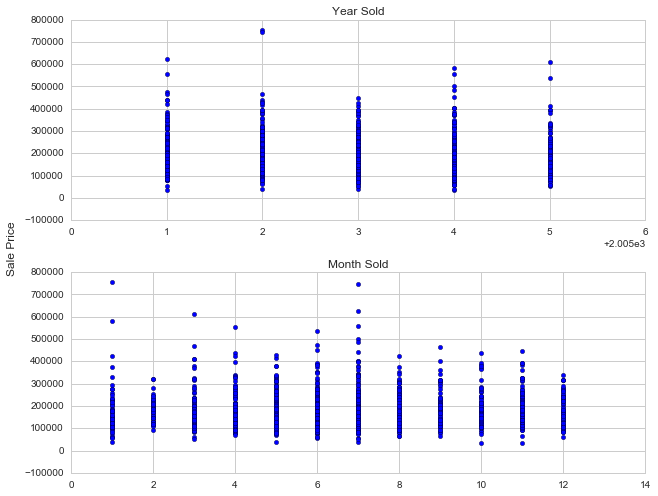

In [17]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(train.YrSold.values, price)
plt.title('Year Sold')

plt.subplot(212)
plt.scatter(train.MoSold.values, price)
plt.title('Month Sold')

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()

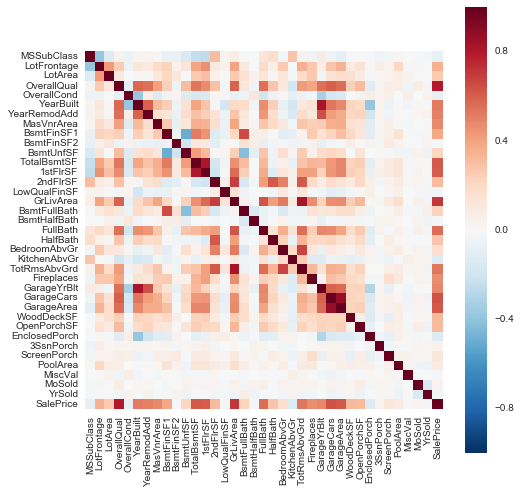

In [18]:
#corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
# selecting without ID
corr = train_cont.iloc[:, 1:].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=1, square=True)

### List the numerical features decendingly by their correlation with Sale Price:

In [19]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCon

The housing price correlates strongly with OverallQual, GrLivArea(GarageCars), GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea and Fireplaces. 

Some of the features have tiny correlation coefficients with the target variable. Such as MiscVal:    -0.02118957964030379 ,
BsmtHalfBath:   -0.016844154297359294 ,BsmtFinSF2:     -0.011378121450215216. 
Sometimes it is not worth keeping features like these ones. Feature eliminations may help some machine learning methods while it doesn't affect others very much or at all (such as tree-based methods). Yet these features may still be useful in combination with other features.


But some of the features are highly correlated among each others.

In [25]:
# Include  target variable also to find correlation between features and target feature as well
train_cont.append(train['SalePrice'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,50.0,85.0,14115.0,5.0,5.0,1993.0,1995.0,0.0,732.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,20.0,75.0,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,60.0,NaN,10382.0,7.0,6.0,1973.0,1973.0,240.0,859.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,50.0,51.0,6120.0,7.0,5.0,1931.0,1950.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,190.0,50.0,7420.0,5.0,6.0,1939.0,1950.0,0.0,851.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


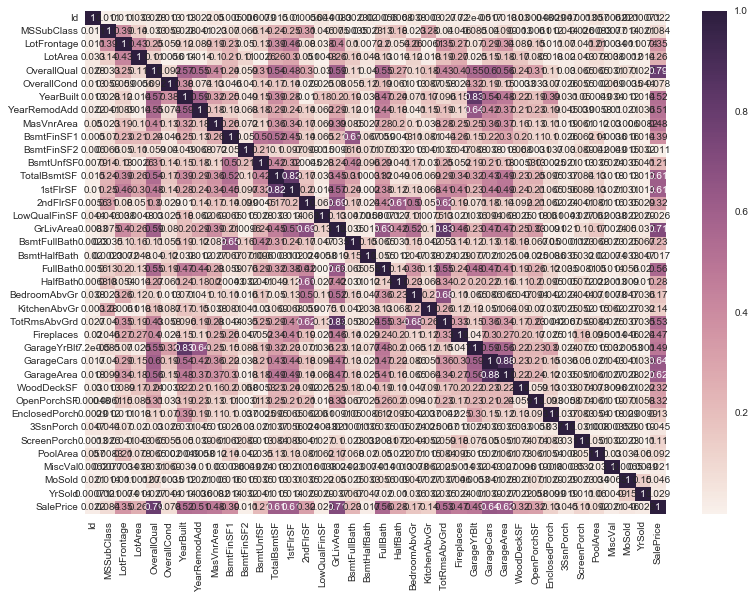

In [26]:
correlationMatrix = train_cont.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

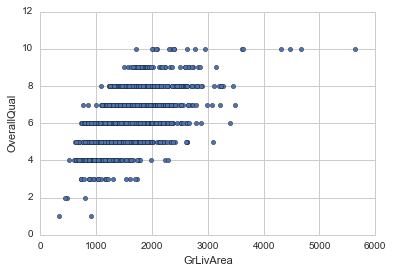

In [110]:
train.plot(kind="scatter", x="GrLivArea", y="OverallQual")

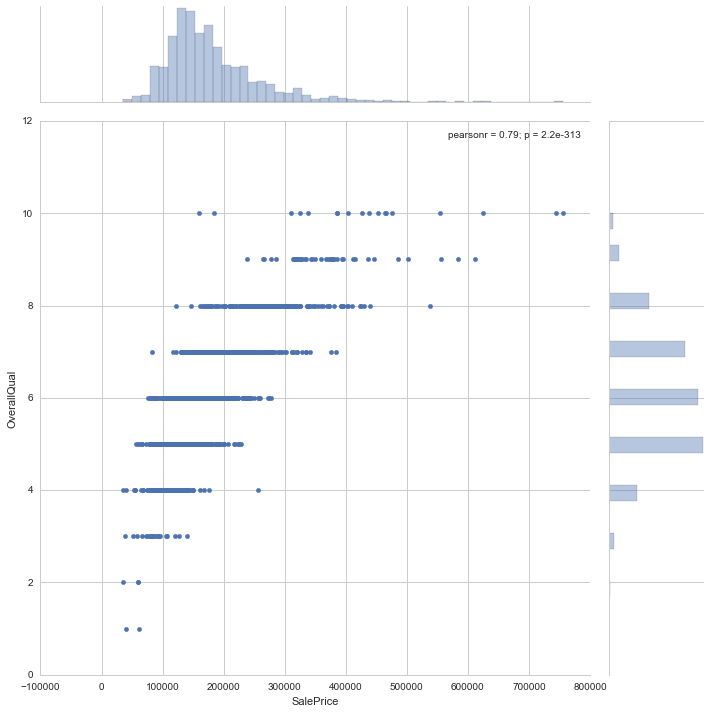

In [111]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
ax = sns.jointplot(x="SalePrice", y="OverallQual", data=train, size=10)

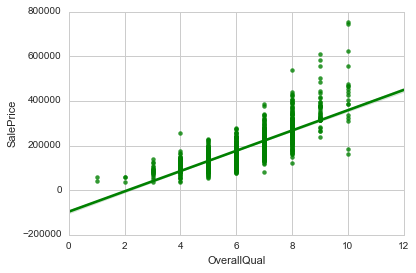

In [112]:
#Plot data and a linear regression model fit.
#Use a 68% confidence interval, which corresponds with the standard error of the estimate:
ax = sns.regplot(x = 'OverallQual', y = 'SalePrice', data = train, color = 'Green',ci=68)

#### Hexbin plots
The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s availible through the matplotlib plt.hexbin function and as a style in jointplot().

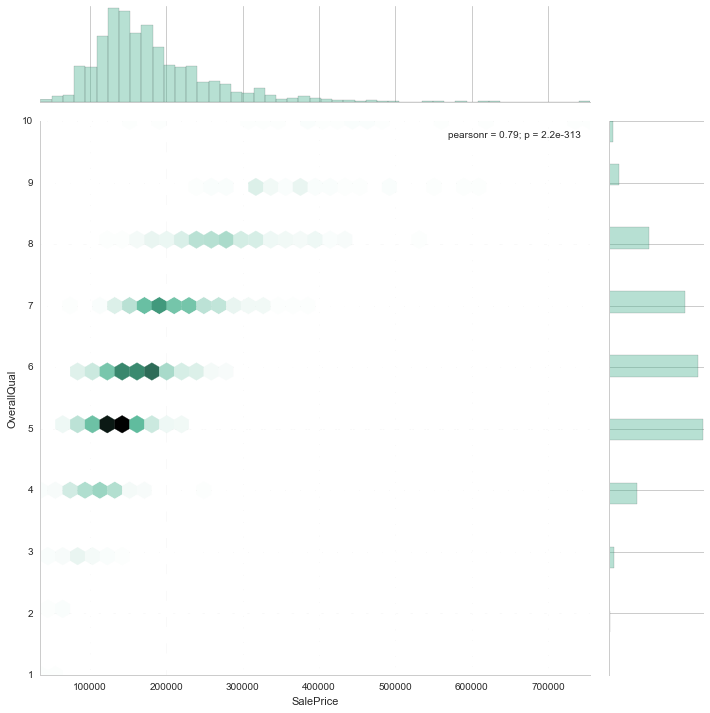

In [113]:
sns.jointplot(x="SalePrice", y="OverallQual", data=train, size=10, kind="hex", color="#4CB391")

A categorical or discrete variable is one that has two or more categories (values).  There are two types of categorical variable, nominal and ordinal.  A nominal variable has no intrinsic ordering to its categories. For example, gender is a categorical variable having two categories (male and female) with no intrinsic ordering to the categories. An ordinal variable has a clear ordering. For example, temperature as a variable with three orderly categories (low, medium and high). A frequency table is a way of counting how often each category of the variable in question occurs. It may be enhanced by the addition of percentages that fall into each category.

In [116]:
train_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [117]:
# Let's see how many examples we have of SaleCondition
train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

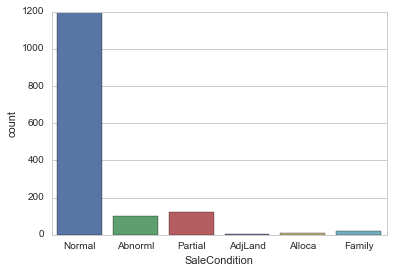

In [118]:
# Show value counts for a single categorical variable:
ax = sns.countplot(x="SaleCondition", data=train)

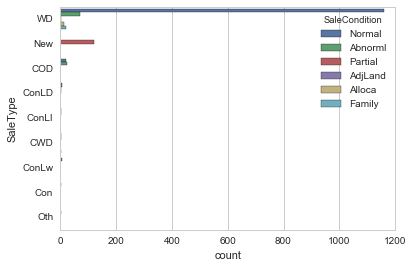

In [119]:
#Show value counts for two categorical variables:
ax = sns.countplot(y="SaleType", hue="SaleCondition", data=train)

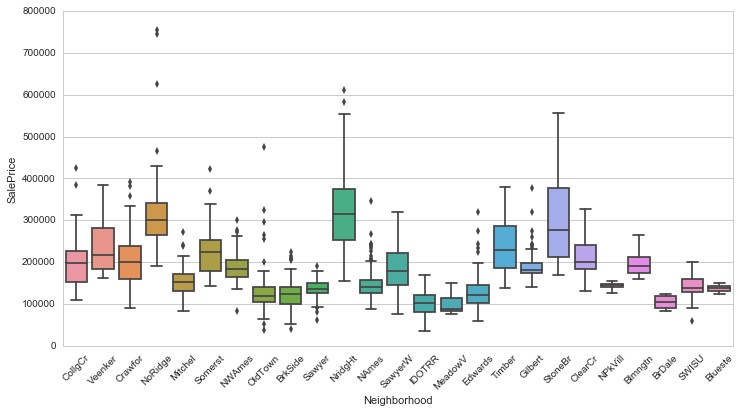

In [121]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)


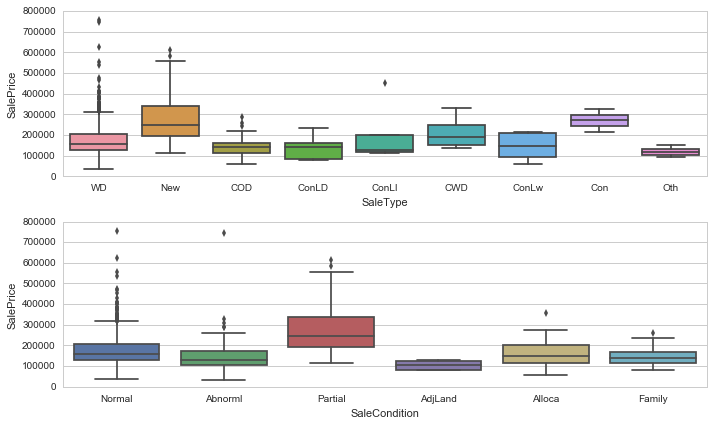

In [122]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train, ax = ax[1])
plt.tight_layout()

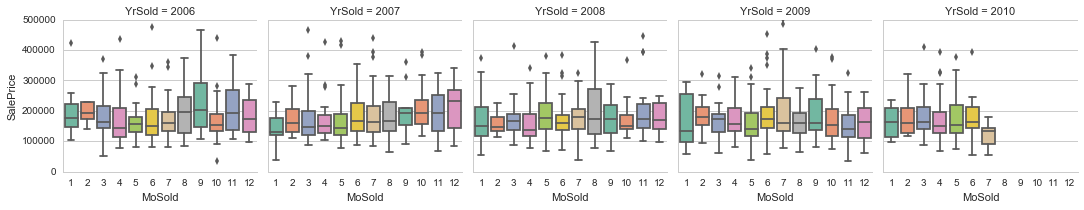

In [127]:
g = sns.FacetGrid(train, col = 'YrSold', col_wrap = 6)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))\
.set(ylim = (0, 500000))
plt.tight_layout()

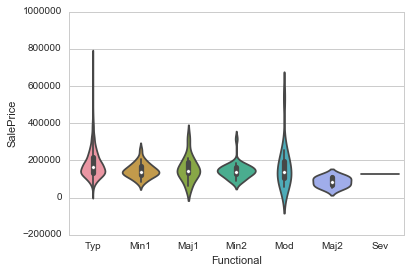

In [129]:
#Home Functionality
sns.violinplot('Functional', 'SalePrice', data = train)

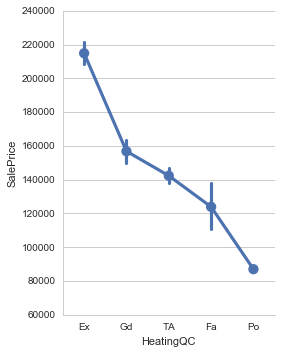

In [148]:
sns.factorplot(x="HeatingQC", y="SalePrice", data=train,size=5, aspect=.8)

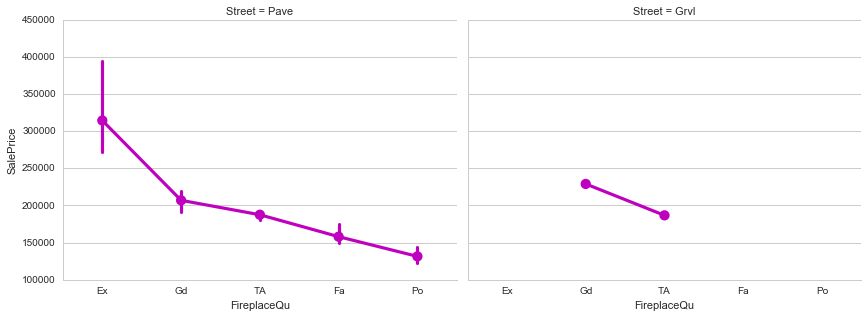

In [155]:
sns.factorplot('FireplaceQu', 'SalePrice', data = train, color = 'm',col = "Street", \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

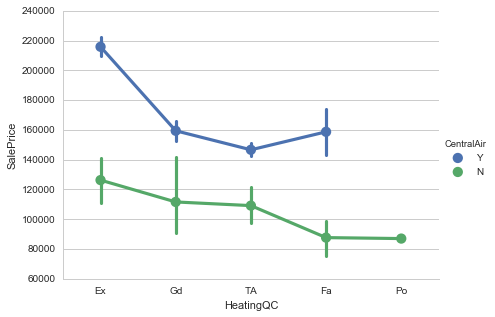

In [152]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = train, 
             size = 4.5, aspect = 1.4)

In [151]:
#Heating
pd.crosstab(train.HeatingQC, train.CentralAir)

CentralAir,N,Y
HeatingQC,,
Ex,8,733
Fa,24,25
Gd,13,228
Po,1,0
TA,49,379


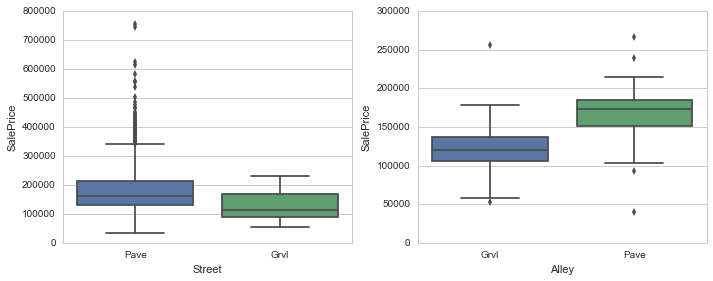

In [156]:
#Street & Alley Access
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = train, ax = ax[1])
plt.tight_layout()

### Combining both the datasets

In [3]:
df = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)

In [4]:
print ("\n\n---------------------")
print ("DATA SET INFORMATION")
print ("---------------------")
print ("Shape of data set:", df.shape, "\n")
print ("Column Headers:", list(df.columns.values), "\n")
print (df.dtypes)



---------------------
DATA SET INFORMATION
---------------------
Shape of data set: (2919, 79) 

Column Headers: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',

In [5]:
import re
missing_values = []
nonumeric_values = []

print ("DATA SET INFORMATION")
print ("========================\n")

for column in df:
    # Find all the unique feature values
    uniq = df[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(df[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

DATA SET INFORMATION

'MSSubClass' has 16 unique values
~~Listing up to 10 unique values~~
[ 60  20  70  50 190  45  90 120  30  85]

-----------------------------------------------------------------------

'MSZoning' has 6 unique values
['RL' 'RM' 'C (all)' 'FV' 'RH' nan]

-----------------------------------------------------------------------

'LotFrontage' has 129 unique values
~~Listing up to 10 unique values~~
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.]

-----------------------------------------------------------------------

'LotArea' has 1951 unique values
~~Listing up to 10 unique values~~
[ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420]

-----------------------------------------------------------------------

'Street' has 2 unique values
['Pave' 'Grvl']

-----------------------------------------------------------------------

'Alley' has 3 unique values
[nan 'Grvl' 'Pave']

-----------------------------------------------------------------------

'LotShape'

### Data Preprocessing

The quality of the data and the amount of useful information that it contains are key factors that determine how well a machine learning algorithm can learn. Therefore, it is absolutely critical that we make sure to examine and preprocess a dataset before we feed it to a learning algorithm.

#### Dealing with missing data

We typically see missing
values as the blank spaces in our data table or as placeholder strings such as NaN
(Not A Number).

<b>Eliminating samples or features with missing values</b>

    * Alley has 2721 missing
    * PoolQC has 2909 missing, 
    * Fence has 2348 missing, 
    * MiscFeature has 2841 missing


In [6]:
#delete the column without having to reassign df you can do:
df.drop('Alley', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)

#### Imputing missing values

One of the most common interpolation techniques is mean imputation, where we simply replace the missing value by the mean value of the entire feature column. A convenient way to achieve this is by using the Imputer class from scikit-learn.

The Imputer class belongs to the so-called transformer classes in scikit-learn that are used for data transformation. The two essential methods of those estimators are fit and transform. The fit method is used to learn the parameters from the training data, and the transform method uses those parameters to transform the data. Any data array that is to be transformed needs to have the same number of features as the data array that was used to fit the model.

In [7]:
#For Numerical Data
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(train_cont)
imputed_data = imr.transform(train_cont.values)

In [8]:
imputed_data

array([[  1.00000000e+00,   6.00000000e+01,   6.50000000e+01, ...,
          2.00000000e+00,   2.00800000e+03,   2.08500000e+05],
       [  2.00000000e+00,   2.00000000e+01,   8.00000000e+01, ...,
          5.00000000e+00,   2.00700000e+03,   1.81500000e+05],
       [  3.00000000e+00,   6.00000000e+01,   6.80000000e+01, ...,
          9.00000000e+00,   2.00800000e+03,   2.23500000e+05],
       ..., 
       [  1.45800000e+03,   7.00000000e+01,   6.60000000e+01, ...,
          5.00000000e+00,   2.01000000e+03,   2.66500000e+05],
       [  1.45900000e+03,   2.00000000e+01,   6.80000000e+01, ...,
          4.00000000e+00,   2.01000000e+03,   1.42125000e+05],
       [  1.46000000e+03,   2.00000000e+01,   7.50000000e+01, ...,
          6.00000000e+00,   2.00800000e+03,   1.47500000e+05]])

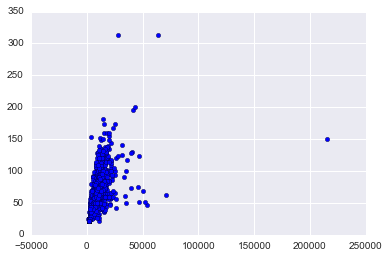

In [7]:
x = df.loc[np.logical_not(df["LotFrontage"].isnull()), "LotArea"]
y = df.loc[np.logical_not(df["LotFrontage"].isnull()), "LotFrontage"]
plt.scatter(x, y)
t = (x <= 25000) & (y <= 150)
p = np.polyfit(x[t], y[t], 1)
df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = np.polyval(p, df.loc[df['LotFrontage'].isnull(), 'LotArea'])

In [8]:
df.loc[df.MasVnrType.isnull(), 'MasVnrType'] = 'None' # no good
df.loc[df.MasVnrType == 'None', 'MasVnrArea'] = 0
df.loc[df.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
df.loc[df.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
df.loc[df.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
df.loc[df.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
df.loc[df.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
df.loc[df.BsmtFinType1=='NoBsmt', 'BsmtFinSF1'] = 0
df.loc[df.BsmtFinType2=='NoBsmt', 'BsmtFinSF2'] = 0
df.loc[df.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = df.BsmtFinSF1.median()
df.loc[df.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0
df.loc[df.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = df.BsmtUnfSF.median()
df.loc[df.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0
df.loc[df.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'
df.loc[df.GarageType.isnull(), 'GarageType'] = 'NoGarage'
df.loc[df.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
df.loc[df.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
df.loc[df.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
df.loc[df.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
df.loc[df.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
df.loc[df.KitchenQual.isnull(), 'KitchenQual'] = 'TA'
df.loc[df.MSZoning.isnull(), 'MSZoning'] = 'RL'
df.loc[df.Utilities.isnull(), 'Utilities'] = 'AllPub'
df.loc[df.Exterior1st.isnull(), 'Exterior1st'] = 'VinylSd'
df.loc[df.Exterior2nd.isnull(), 'Exterior2nd'] = 'VinylSd'
df.loc[df.Functional.isnull(), 'Functional'] = 'Typ'
df.loc[df.SaleCondition.isnull(), 'SaleCondition'] = 'Normal'
df.loc[df.SaleCondition.isnull(), 'SaleType'] = 'WD'
df.loc[df['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
#GarageYrBlt
df.loc[df.GarageYrBlt.isnull(), 'GarageYrBlt'] = df.GarageYrBlt.median()
# only one is null and it has type Detchd
df.loc[df['GarageArea'].isnull(), 'GarageArea'] = df.loc[df['GarageType']=='Detchd', 'GarageArea'].mean()
df.loc[df['GarageCars'].isnull(), 'GarageCars'] = df.loc[df['GarageType']=='Detchd', 'GarageCars'].median()

### Handling categorical data
So far, we have only been working with numerical values. When we are talking about categorical data, we have to further distinguish between nominal and ordinal features. Ordinal features can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can define an order XL > L > M. In contrast, nominal features don't imply any order and, to continue with the previous example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.

#### Mapping ordinal features
To make sure that the learning algorithm interprets the ordinal features correctly, we need to convert the categorical string values into integers. Unfortunately, there is no convenient function that can automatically derive the correct order of the labels of our size feature. Thus, we have to define the mapping manually. In the following simple example, let's assume that we know the difference between features, for example, XL = L + 1 = M + 2

In [9]:
size_mapping = {'Y': 1,'N': 0}
df['CentralAir'] = df['CentralAir'].map(size_mapping)

If we want to transform the integer values back to the original string
representation at a later stage, we can simply define a reverse-mapping
dictionary inv_size_mapping = {v: k for k, v in size_mapping.items()} that can then be used via the pandas' map method on the transformed feature column similar to the size_mapping dictionary that we used previously.

#### Performing one-hot encoding on nominal features

After executing the following code, 

* from  sklearn.preprocessing import LabelEncoder

* "categorical feilds is cats array"

* encode=LabelEncoder()

    * for col in cats:
        
        * train[col]=encode.fit_transform(train[col]
        
the first column of the NumPy array X now holds the new color values, which are encoded as follows:
    * blue == 0
    * green == 1
    * red == 2
If we stop at this point and feed the array to our classifier, we will make one of the most common mistakes in dealing with categorical data. Although the color values don't come in any particular order, a learning algorithm will now assume that green is larger than blue, and red is larger than green. Although this assumption is incorrect, the algorithm could still produce useful results. However, those results would not be optimal.

A common workaround for this problem is to use a technique called one-hot encoding. The idea behind this approach is to create a new dummy feature for each unique value in the nominal feature column. Here, we would convert the color feature into three new features: blue, green, and red. Binary values can then be used to indicate the particular color of a sample; for example, a blue sample can be encoded as blue=1, green=0, red=0.

When we initialized the OneHotEncoder, we defined the column position of the variable that we want to transform via the categorical_features parameter (note that color is the first column in the feature matrix X).

* from sklearn.preprocessing import OneHotEncoder
* ohe = OneHotEncoder(categorical_features= [0])
* ohe.fit_transform(train).toarray()

By default, the OneHotEncoder returns a sparse matrix when we use the transform method, and we converted the sparse matrix representation into a regular (dense) NumPy array for the purposes of visualization via the toarray method. Sparse matrices are simply a more efficient way of storing large datasets, and one that is supported by many scikit-learn functions, which is especially useful if it contains a lot of zeros. To omit the toarray step, we could initialize the encoder as OneHotEncoder(…,sparse=False) to return a regular NumPy array.

An even more convenient way to create those dummy features via one-hot encoding is to use the get_dummies method implemented in pandas. Applied on a DataFrame, the get_dummies method will only convert string columns and leave all other columns unchanged:
* pd.get_dummies(df[['price', 'color', 'size']])


In [10]:
df = pd.get_dummies(df)

#### One way to Separate X_Train, X_Test

* X_train = X[:train.shape[0]]
* X_test = X[train.shape[0]:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F358D91550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F35AAD19B0>]], dtype=object)

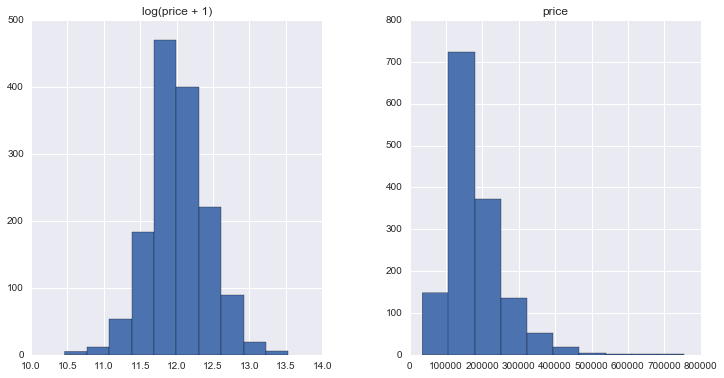

In [19]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

###### First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal

In [20]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr
#log transform skewed numeric features:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index


In [11]:
#Submissions are evaluated on Root-Mean-Squared-Error (RMSE) 
#between the logarithm of the predicted value and the logarithm of the observed 
#sales price. 
#(Taking logs means that errors in predicting expensive houses and cheap houses
#will affect the result equally.)

#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/details/evaluation

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

Count_Row=df.shape[0] #gives number of row count

Count_Col=df.shape[1] #gives number of col count

In [12]:
#creating matrices for sklearn:
X_train = df[:train.shape[0]]
X_test = df[train.shape[0]:]
y = train.SalePrice

### Partitioning a dataset in training and test sets

In [13]:
from sklearn.cross_validation import train_test_split
X = df[:train.shape[0]].values
y = train.SalePrice.values
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=0)

we used the train_test_split function to randomly split X and y into separate training and test datasets. By setting test_size=0.3 we assigned 30 percent of the wine samples to X_test and y_test, and the remaining 70 percent
of the samples were assigned to X_train and y_train, respectively.

#### Bringing features onto the same scale
Feature scaling is a crucial step in our preprocessing pipeline that can easily be forgotten. Decision trees and random forests are one of the very few machine learning algorithms where we don't need to worry about feature scaling. 

there are two common approaches to bringing different features onto the same scale: normalization and standardization. Those terms are often used quite loosely in different fields, and the meaning has to be derived from the context. Most often, normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. To normalize our data, we can simply apply the min-max scaling to each feature column.

Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval, standardization can be more practical for many machine learning algorithms. The reason is that many linear models, such as the logistic regression and SVM initialize the weights to 0 or small random values close to 0. Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights. Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales
the data to a limited range of values.

In [14]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


#### The issue is that after your scaling step, the labels are float-valued, which is not a valid label-type; you convert to int or str for the y_train and y_test to work

In [15]:
y_train = y_train.astype(int)
y_train

y_test = y_test.astype(int)

#### Selecting meaningful features

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.930528375734
Test accuracy: 0.906392694064


In [17]:
lr.intercept_

array([-4.25766833, -0.24251662,  0.        , -4.27032283])

In [18]:
lr.coef_

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.01149143,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.08711031,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

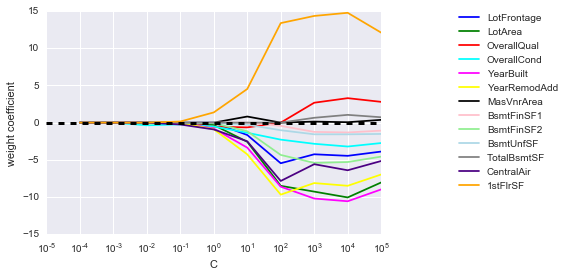

In [19]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
         'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column+1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()

##### The resulting plot provides us with further insights about the behavior of L1 regularization.

#### Assessing feature importance with random forests

Using a random forest, we
can measure feature importance as the averaged impurity decrease computed from all decision trees in the forest without making any assumptions whether our data is
linearly separable or not.

In [79]:
model = RandomForestClassifier()
model.fit(X_train_std, y_train)

feature_imp = pd.DataFrame(model.feature_importances_, index=df.columns, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_20

Index(['BsmtQual_TA', 'ExterQual_TA', 'GrLivArea', 'GarageArea', 'YearBuilt',
       'TotalBsmtSF', '1stFlrSF', 'OverallQual', '2ndFlrSF', 'LotArea',
       'GarageYrBlt', 'FullBath', 'GarageCars', 'GarageType_Detchd',
       'TotRmsAbvGrd', 'LotFrontage', 'BsmtFinSF1', 'HalfBath',
       'FireplaceQu_TA', 'BsmtUnfSF'],
      dtype='object')

 1) GrLivArea                      0.073841
 2) OverallQual                    0.052059
 3) YearBuilt                      0.045931
 4) FullBath                       0.039280
 5) TotalBsmtSF                    0.032935
 6) GarageArea                     0.031582
 7) GarageYrBlt                    0.031156
 8) 1stFlrSF                       0.030822
 9) GarageCars                     0.024684
10) YearRemodAdd                   0.024592
11) ExterQual_TA                   0.024415
12) 2ndFlrSF                       0.024035
13) LotArea                        0.022460
14) ExterQual_Gd                   0.020364
15) OpenPorchSF                    0.020120
16) TotRmsAbvGrd                   0.019409
17) KitchenQual_TA                 0.019297
18) Fireplaces                     0.018921
19) LotFrontage                    0.017396
20) BsmtQual_TA                    0.016858


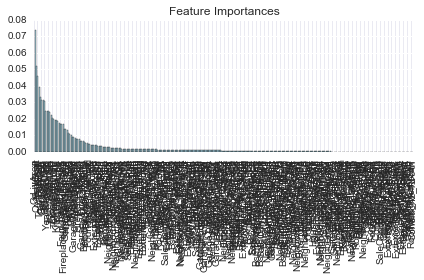

In [71]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[0:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(20):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))



plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

After executing the preceding code, we created a plot that ranks the different features in the dataset by their relative importance; note that the feature importances are normalized so that they sum up to 1.0.

#### Feature selector that removes all low-variance features.
This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [74]:
from sklearn.feature_selection import VarianceThreshold, f_regression, SelectKBest

#Find all features with more than 90% variance in values.
threshold = 0.90
vt = VarianceThreshold().fit(X_train_std)

# Find feature names
feat_var_threshold = df.columns[vt.variances_ > threshold * (1-threshold)]
# select the top 20 

feat_var_threshold[0:20]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath'],
      dtype='object')

#### Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method.These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile):
* For regression: f_regression, mutual_info_regression
* For classification: chi2, f_classif, mutual_info_classif

In [63]:
X_scored = SelectKBest(score_func=f_regression, k='all').fit(X_train_std, y_train)
feature_scoring = pd.DataFrame({
        'feature': df.columns,
        'score': X_scored.scores_
    })

feat_scored_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values
feat_scored_20

array(['OverallQual', 'GrLivArea', 'FullBath', 'GarageCars',
       'ExterQual_TA', 'YearBuilt', 'GarageArea', 'Foundation_PConc',
       'YearRemodAdd', 'KitchenQual_TA', 'ExterQual_Gd', 'BsmtQual_TA',
       'TotalBsmtSF', '1stFlrSF', 'GarageYrBlt', 'FireplaceQu_NoFireplace',
       'TotRmsAbvGrd', 'Fireplaces', 'KitchenQual_Gd', 'GarageFinish_Unf'], dtype=object)

#### Recursive Feature Elimination

In [77]:
#Select 20 features from using recursive feature elimination (RFE) with logistic regression model.
from sklearn.feature_selection import RFE
rfe = RFE(LogisticRegression(), 20)
rfe.fit(X_train_std, y_train)

feature_rfe_scoring = pd.DataFrame({
        'feature': df.columns,
        'score': rfe.ranking_
    })

feat_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_20

array(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd',
       'GarageCars', 'GarageArea', 'MSZoning_RM', 'Neighborhood_IDOTRR',
       'Neighborhood_NoRidge', 'BldgType_1Fam', 'HouseStyle_2.5Fin',
       'ExterQual_Ex', 'ExterQual_TA', 'BsmtFinType1_GLQ',
       'FireplaceQu_NoFireplace'], dtype=object)

### Final feature selection
Finally features selected by all methods will be merged together

In [80]:
features = np.hstack([
        feat_var_threshold[0:20], 
        feat_imp_20,
        feat_scored_20,
        feat_rfe_20
    ])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-1stFlrSF
	-2ndFlrSF
	-BldgType_1Fam
	-BsmtFinSF1
	-BsmtFinSF2
	-BsmtFinType1_GLQ
	-BsmtFullBath
	-BsmtHalfBath
	-BsmtQual_TA
	-BsmtUnfSF
	-CentralAir
	-ExterQual_Ex
	-ExterQual_Gd
	-ExterQual_TA
	-FireplaceQu_NoFireplace
	-FireplaceQu_TA
	-Fireplaces
	-Foundation_PConc
	-FullBath
	-GarageArea
	-GarageCars
	-GarageFinish_Unf
	-GarageType_Detchd
	-GarageYrBlt
	-GrLivArea
	-HalfBath
	-HouseStyle_2.5Fin
	-KitchenQual_Gd
	-KitchenQual_TA
	-LotArea
	-LotFrontage
	-LowQualFinSF
	-MSSubClass
	-MSZoning_RM
	-MasVnrArea
	-Neighborhood_IDOTRR
	-Neighborhood_NoRidge
	-OverallCond
	-OverallQual
	-TotRmsAbvGrd
	-TotalBsmtSF
	-YearBuilt
	-YearRemodAdd


### Compressing Data via Dimensionality Reduction

#### Unsupervised dimensionality reduction via principal component analysis

Principal component analysis (PCA) is an unsupervised linear transformation
technique that is widely used across different fields, most prominently for
dimensionality reduction.PCA helps us
to identify patterns in data based on the correlation between features.

In [72]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([  6.76260309e-02,   3.18235636e-02,   2.70104957e-02,
         2.44606650e-02,   2.14310356e-02,   1.86230689e-02,
         1.64221723e-02,   1.57242287e-02,   1.33529768e-02,
         1.27176408e-02,   1.22048639e-02,   1.18258642e-02,
         1.13833797e-02,   1.09464366e-02,   1.08039675e-02,
         1.06462855e-02,   9.94111624e-03,   9.82547724e-03,
         9.63622798e-03,   9.41347885e-03,   9.04774087e-03,
         8.81794351e-03,   8.70854231e-03,   8.59220105e-03,
         8.39196031e-03,   8.23245622e-03,   8.13514438e-03,
         8.03210177e-03,   7.89854902e-03,   7.85074640e-03,
         7.77888956e-03,   7.57949481e-03,   7.42984448e-03,
         7.31159568e-03,   7.26805353e-03,   7.15368153e-03,
         7.07152122e-03,   7.03394444e-03,   6.96450908e-03,
         6.89692166e-03,   6.69932756e-03,   6.61918708e-03,
         6.45178941e-03,   6.42788968e-03,   6.30984104e-03,
         6.16182756e-03,   6.08300135e-03,   6.02428509e-03,
         5.95464495e-03,

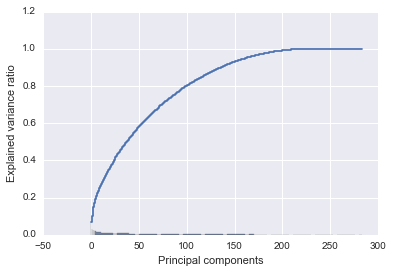

In [73]:
plt.bar(range(0, 284), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0, 284), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()